In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


# EDA

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Adjust path & filename depending on dataset
df = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.shape

(8807, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Top Countries by Number of Movies Produced

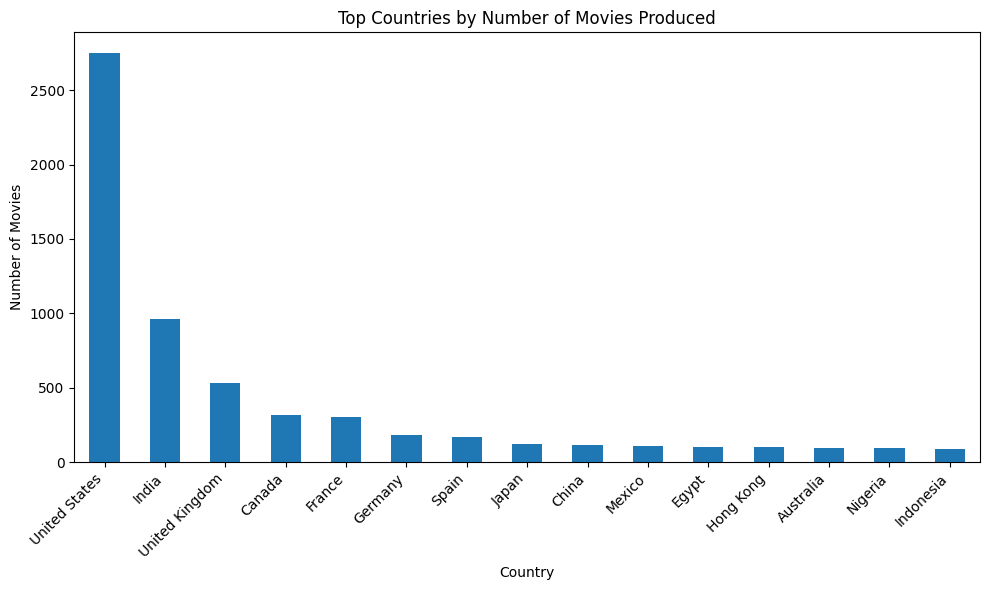

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is called df

# Drop missing values in 'country'
df_country = df.dropna(subset=["country"])

# Some rows have multiple countries separated by commas -> split them
df_country_expanded = df_country.assign(country=df_country["country"].str.split(", ")).explode("country")

# Filter only movies
df_movies = df_country_expanded[df_country_expanded["type"] == "Movie"]

# Count movies by country
country_counts = df_movies["country"].value_counts().head(15)  # top 15 countries

# Plot
plt.figure(figsize=(10,6))
country_counts.plot(kind="bar")
plt.title("Top Countries by Number of Movies Produced")
plt.xlabel("Country")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


how many movies fall into each rating category

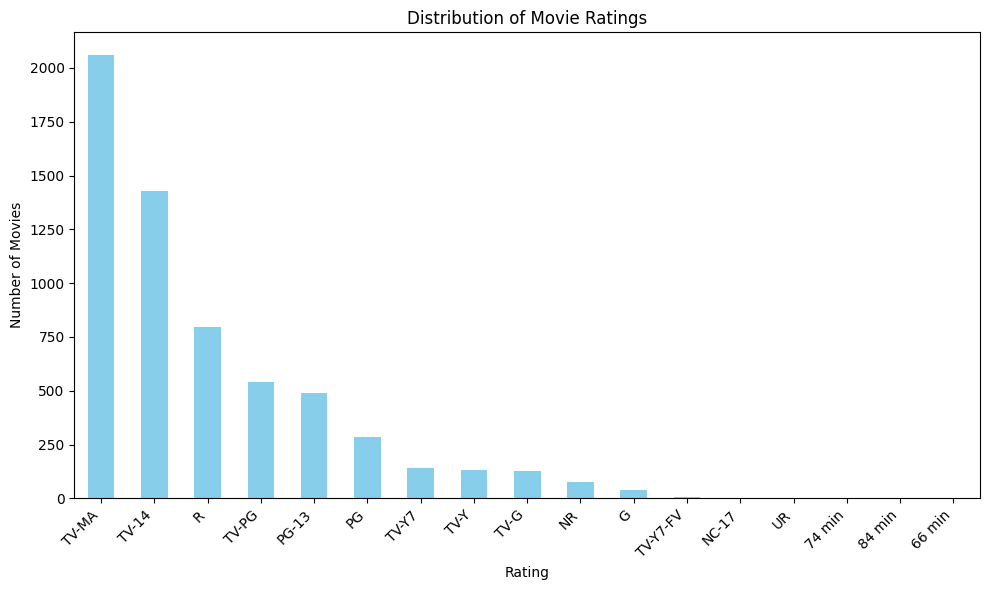

In [7]:
# Filter only movies
df_movies = df[df["type"] == "Movie"]

# Count movies by rating
rating_counts = df_movies["rating"].value_counts()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
rating_counts.plot(kind="bar", color="skyblue")
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Most Common Genres

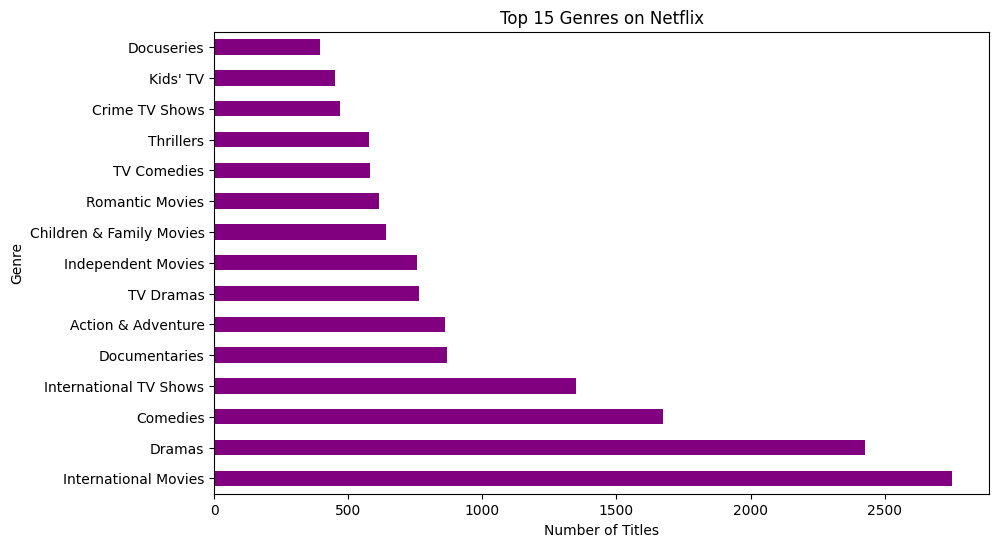

In [8]:
all_genres = df["listed_in"].str.split(", ").explode()
top_genres = all_genres.value_counts().head(15)

top_genres.plot(kind="barh", figsize=(10,6), color="purple")
plt.title("Top 15 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()


heatmap

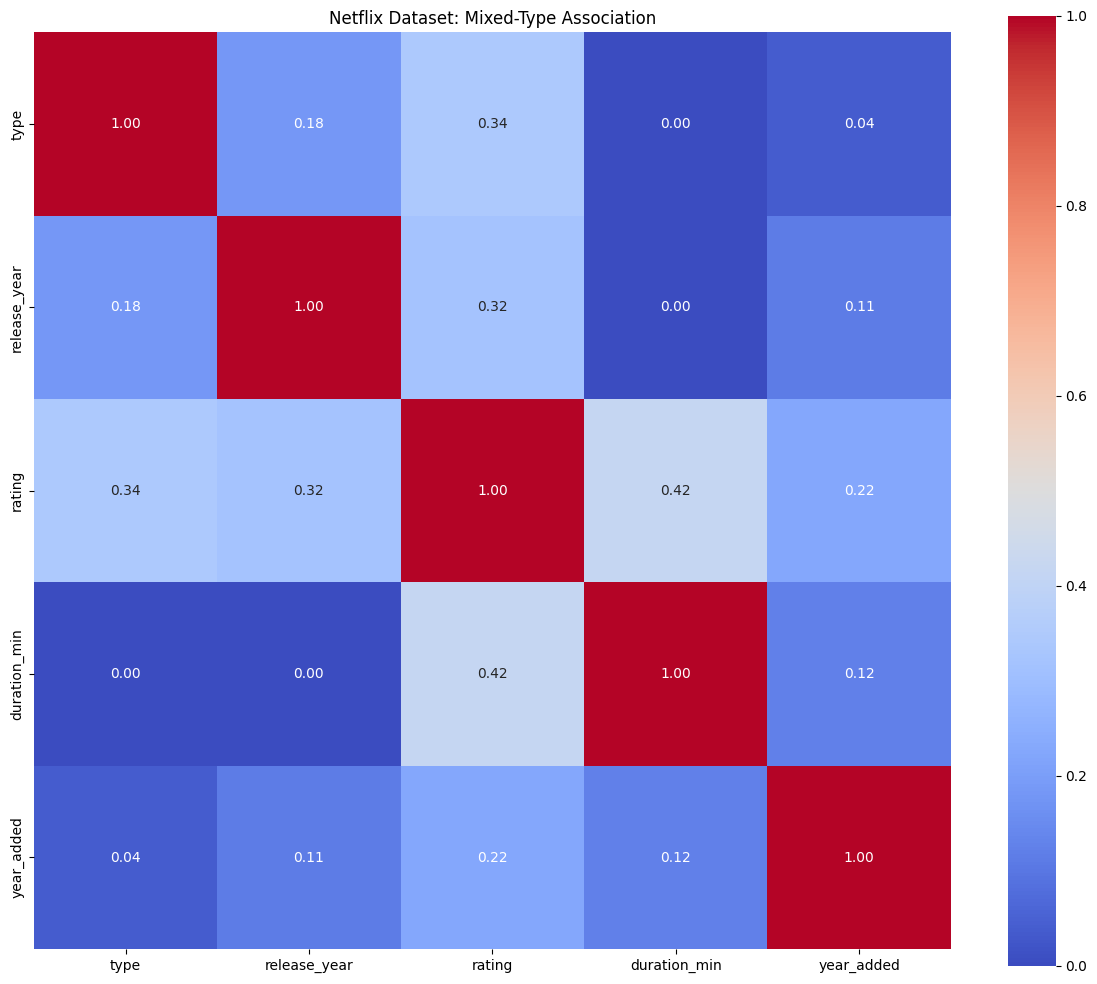

rating        duration_min    0.415507
duration_min  rating          0.415507
rating        type            0.342361
type          rating          0.342361
release_year  rating          0.317825
rating        release_year    0.317825
year_added    rating          0.224468
rating        year_added      0.224468
type          release_year    0.181710
release_year  type            0.181710
year_added    duration_min    0.124436
duration_min  year_added      0.124436
release_year  year_added      0.110473
year_added    release_year    0.110473
type          year_added      0.038007
dtype: float64


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from pandas.api.types import is_numeric_dtype

# =========================
# Helpers
# =========================
def correlation_ratio(categories, values):
    """
    Correlation ratio (eta) for categorical (categories) vs numeric (values).
    Returns a value in [0,1].
    """
    s_cat = pd.Series(categories)
    s_val = pd.to_numeric(pd.Series(values), errors="coerce")
    mask = s_cat.notna() & s_val.notna()
    s_cat = s_cat[mask]
    s_val = s_val[mask]
    if len(s_val) == 0:
        return 0.0

    cats = pd.Categorical(s_cat)
    codes = cats.codes  # already aligned with s_val
    df_tmp = pd.DataFrame({"code": codes, "val": s_val})
    means = df_tmp.groupby("code")["val"].mean()
    counts = df_tmp.groupby("code")["val"].count()
    overall = s_val.mean()

    ss_between = (counts * (means - overall) ** 2).sum()
    ss_total = ((s_val - overall) ** 2).sum()
    return float(np.sqrt(ss_between / ss_total)) if ss_total > 0 else 0.0

def cramers_v_corrected(x, y):
    """
    Bias-corrected Cramér’s V for categorical vs categorical.
    Returns a value in [0,1].
    """
    s1 = pd.Series(x).astype("category")
    s2 = pd.Series(y).astype("category")
    table = pd.crosstab(s1, s2, dropna=True)
    if table.empty:
        return 0.0
    chi2, _, _, _ = ss.chi2_contingency(table, correction=False)
    n = table.values.sum()
    if n == 0:
        return 0.0
    phi2 = chi2 / n
    r, k = table.shape
    # Bias correction
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    denom = min((kcorr - 1), (rcorr - 1))
    return float(np.sqrt(phi2corr / denom)) if denom > 0 else 0.0

def make_mixed_assoc_heatmap(
    df,
    cols=None,
    max_cat_card=80,
    drop_cols=("show_id", "title", "description", "director"),  # optional skips
    figsize=(12,10),
    title="Mixed-Type Association Heatmap (Pearson / Cramér’s V / η)"
):
    """
    Builds an association matrix across numeric + categorical columns:
      - Pearson for numeric-numeric
      - Cramér’s V for categorical-categorical
      - Correlation Ratio (η) for numeric-categorical
    Plots a heatmap and returns the matrix as a DataFrame.
    """
    dfc = df.copy()

    # ---- Useful derived columns (optional but handy for this dataset)
    # duration -> duration_min for Movies (e.g., "123 min")
    if "type" in dfc.columns and "duration" in dfc.columns:
        mask_movie = (dfc["type"] == "Movie") & dfc["duration"].astype(str).str.contains("min", na=False)
        dfc.loc[mask_movie, "duration_min"] = (
            dfc.loc[mask_movie, "duration"].astype(str).str.replace(" min", "", regex=False).astype(float)
        )

    # date_added -> year_added
    if "date_added" in dfc.columns:
        dfc["date_added"] = pd.to_datetime(dfc["date_added"], errors="coerce")
        dfc["year_added"] = dfc["date_added"].dt.year

    # ---- Choose columns
    if cols is None:
        cols = [c for c in dfc.columns if c not in drop_cols]

    # Identify categorical vs numeric
    def is_categorical(col):
        return not is_numeric_dtype(dfc[col])

    # Filter out super high-cardinality categoricals (keeps plot readable & quick)
    filtered_cols = []
    for c in cols:
        if c not in dfc.columns:
            continue
        if is_numeric_dtype(dfc[c]):
            filtered_cols.append(c)
        else:
            nunique = dfc[c].nunique(dropna=True)
            if (max_cat_card is None) or (nunique <= max_cat_card):
                filtered_cols.append(c)

    cols = filtered_cols
    if len(cols) < 2:
        raise ValueError("Not enough columns after filtering to compute associations.")

    n = len(cols)
    M = pd.DataFrame(np.zeros((n, n), dtype=float), index=cols, columns=cols)

    for i, c1 in enumerate(cols):
        for j, c2 in enumerate(cols):
            if i == j:
                M.iloc[i, j] = 1.0
                continue

            s1 = dfc[c1]
            s2 = dfc[c2]
            num1 = is_numeric_dtype(s1)
            num2 = is_numeric_dtype(s2)

            if num1 and num2:
                # Pearson on aligned, non-null pairs
                tmp = pd.DataFrame({c1: pd.to_numeric(s1, errors="coerce"),
                                    c2: pd.to_numeric(s2, errors="coerce")}).dropna()
                val = tmp.corr().iloc[0, 1] if len(tmp) > 1 else 0.0
            elif (not num1) and (not num2):
                # Categorical vs categorical
                val = cramers_v_corrected(s1.astype("category"), s2.astype("category"))
            else:
                # Mixed: numeric vs categorical -> Correlation Ratio (η)
                if num1:
                    val = correlation_ratio(s2, s1)
                else:
                    val = correlation_ratio(s1, s2)

            if np.isnan(val):
                val = 0.0
            M.iloc[i, j] = float(np.clip(val, 0.0, 1.0))

    # Plot heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(M, annot=True, fmt=".2f", cmap="coolwarm", vmin=0, vmax=1, square=True)
    plt.title(title)
    plt.tight_layout()
    plt.show()
    return M

# =========================
# Run on your dataframe
# =========================
assoc_matrix = make_mixed_assoc_heatmap(
    df,
    cols=None,            # or pass a specific list of columns
    max_cat_card=80,      # set to None to include everything (can be slow/noisy)
    figsize=(12,10),
    title="Netflix Dataset: Mixed-Type Association"
)

# Optional: list strongest relationships (top 15, excluding diagonal)
top_pairs = (
    assoc_matrix.where(~np.eye(len(assoc_matrix), dtype=bool))
    .stack()
    .sort_values(ascending=False)
)
print(top_pairs.head(15))


In [10]:
import re

def clean_text(s: str) -> str:
    s = str(s).lower()
    s = re.sub(r"[^a-z0-9\s,]", " ", s)   # keep letters, numbers, spaces, commas
    s = re.sub(r"\s+", " ", s).strip()
    return s

def prepare_list_field(s: str) -> str:
    s = clean_text(s)
    s = s.replace(",", " ")  # turn comma-separated lists into tokens
    return s

# Apply cleaning
desc_text  = df["description"].fillna("").map(clean_text)
genre_text = df["listed_in"].fillna("").map(prepare_list_field)
cast_text  = df["cast"].fillna("").map(prepare_list_field)


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec_desc  = TfidfVectorizer(stop_words="english", ngram_range=(1,2), max_features=30000, min_df=3)
vec_genre = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b")
vec_cast  = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b", max_features=20000, min_df=2)

X_desc  = vec_desc.fit_transform(desc_text)
X_genre = vec_genre.fit_transform(genre_text)
X_cast  = vec_cast.fit_transform(cast_text)


In [12]:
from scipy.sparse import hstack
from sklearn.preprocessing import normalize

# Weight factors
W_DESC, W_GENRE, W_CAST = 1.0, 1.2, 1.0

X = hstack([W_DESC * X_desc, W_GENRE * X_genre, W_CAST * X_cast]).tocsr()
X = normalize(X)  # normalize for cosine similarity

# Quick lookup dictionary
title_to_idx = {t.lower(): i for i, t in enumerate(df["title"].astype(str))}


In [13]:
import numpy as np

def _top_n_similar(sim_vector, n=10, exclude_index=None):
    sims = sim_vector.flatten()
    if exclude_index is not None:
        sims[exclude_index] = -1  # exclude the query movie itself
    top_idx = np.argpartition(sims, -n)[-n:]
    top_idx = top_idx[np.argsort(-sims[top_idx])]

    out = df.loc[top_idx, ["title", "listed_in", "rating", "type", "country"]].copy()
    out.insert(1, "similarity", np.round(sims[top_idx], 4))
    return out.reset_index(drop=True)

def recommend_by_title(title, n=10):
    key = title.strip().lower()
    if key not in title_to_idx:
        raise ValueError(f"Title '{title}' not found in dataset.")
    idx = title_to_idx[key]
    sim = X[idx].dot(X.T).toarray()   # FIXED
    return _top_n_similar(sim, n=n, exclude_index=idx)

def recommend_by_text(query, n=10):
    q_desc  = vec_desc.transform([clean_text(query)])
    q_genre = vec_genre.transform([prepare_list_field(query)])
    q_cast  = vec_cast.transform([prepare_list_field(query)])

    q = hstack([W_DESC*q_desc, W_GENRE*q_genre, W_CAST*q_cast]).tocsr()
    q = normalize(q)

    sim = q.dot(X.T).toarray()        # FIXED
    return _top_n_similar(sim, n=n)



In [14]:
# A) Recommend based on a movie title
try:
    display(recommend_by_title("Inception", n=5))
except ValueError as e:
    print(e)

# B) Recommend based on free-text description
display(recommend_by_text("romantic comedy in new york", n=5))


,title,similarity,listed_in,rating,type,country
0,Dragonheart: A New Beginning,0.4250,"Action & Adventure, Sci-Fi & Fantasy",PG,Movie,United States
1,Dragonheart,0.4224,"Action & Adventure, Sci-Fi & Fantasy",PG-13,Movie,United States
2,Æon Flux,0.4216,"Action & Adventure, Sci-Fi & Fantasy",PG-13,Movie,United States
3,Transcendence,0.4019,"Sci-Fi & Fantasy, Thrillers",PG-13,Movie,"United Kingdom, China, United States"
4,Incoming,0.4011,"Action & Adventure, Sci-Fi & Fantasy",TV-MA,Movie,"Serbia, United States"


,title,similarity,listed_in,rating,type,country
0,"Ray Romano: Right Here, Around the Corner",0.2938,Stand-Up Comedy,TV-MA,Movie,United States
1,Ek Main Aur Ekk Tu,0.2739,"Comedies, International Movies, Romantic Movies",TV-14,Movie,India
2,Colin Quinn: Unconstitutional,0.2617,Stand-Up Comedy,TV-MA,Movie,United States
3,Vir Das: Abroad Understanding,0.2582,Stand-Up Comedy,TV-MA,Movie,United States
4,Michelle Wolf: Joke Show,0.2554,Stand-Up Comedy,TV-MA,Movie,United States


In [24]:
# A) Recommend based on a movie title
try:
    display(recommend_by_title("Ek Main Aur Ekk Tu", n=5))
except ValueError as e:
    print(e)

# B) Recommend based on free-text description
display(recommend_by_text("fantasy and animation", n=5))


,title,similarity,listed_in,rating,type,country
0,Ready,0.5510,"Comedies, International Movies, Romantic Movies",TV-PG,Movie,India
1,Santo Cachón,0.5161,"Comedies, International Movies, Romantic Movies",TV-14,Movie,Colombia
2,What the Jatt!!,0.5007,"Comedies, International Movies, Romantic Movies",TV-PG,Movie,India
3,Okafor's Law,0.4970,"Comedies, International Movies, Romantic Movies",TV-14,Movie,Nigeria
4,Judwaa,0.4922,"Comedies, International Movies, Romantic Movies",TV-14,Movie,India


,title,similarity,listed_in,rating,type,country
0,A Boy Called Po,0.3362,"Dramas, Sci-Fi & Fantasy",PG,Movie,United States
1,Golden Time,0.3239,"International Movies, Sci-Fi & Fantasy",TV-Y,Movie,Japan
2,Black Mirror: Bandersnatch,0.3191,"Dramas, International Movies, Sci-Fi & Fantasy",TV-MA,Movie,United States
3,The Magicians,0.3018,"TV Dramas, TV Sci-Fi & Fantasy",TV-MA,TV Show,"United States, Canada"
4,2036 Origin Unknown,0.2870,Sci-Fi & Fantasy,TV-14,Movie,United Kingdom
